Answer to question at bottom.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [3]:
music = pd.DataFrame()

In [4]:
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


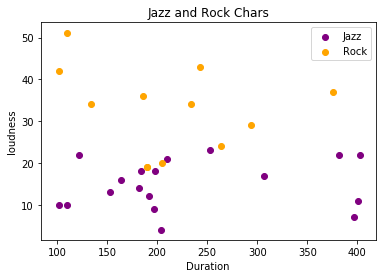

In [5]:
plt.scatter(
    music[music.jazz == 1].duration,
    music[music.jazz == 1].loudness,
    color='purple')
plt.scatter(
    music[music.jazz == 0].duration,
    music[music.jazz == 0].loudness,
    color='orange')

plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Chars')
plt.xlabel('Duration')
plt.ylabel('loudness')
plt.show()

In [6]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [7]:
neighbors.predict([[20, 300]])

array([1], dtype=int64)

In [8]:
from scipy import stats
neighbors = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
x = pd.DataFrame({
    'loudness': stats.zscore(music.loudness),
    'duration': stats.zscore(music.duration)
})

y=music.jazz
neighbors.fit(x,y)
print(neighbors.predict([[20,300]]))
print(neighbors.predict_proba([[20,300]]))

[1]
[[0.19995059 0.80004941]]


In [9]:
x = np.array(x)
y = np.array(y)

In [10]:
x

array([[-0.34062759, -0.42733993],
       [ 1.05681894, -0.9756803 ],
       [ 1.84288262,  0.21970171],
       [ 1.23149976, -0.40540632],
       [ 0.00873404, -1.10728199],
       [-1.12669127, -0.28477143],
       [ 0.6201169 ,  0.77900889],
       [ 0.00873404,  1.74408795],
       [-1.03935086, -1.32661814],
       [ 0.18341486,  0.45000467],
       [-0.16594678, -0.19703697],
       [-1.03935086, -1.23888368],
       [-0.427968  ,  0.92157739],
       [ 2.54160588, -1.23888368],
       [-1.30137208,  1.90859006],
       [-0.77732963, -0.76731096],
       [-0.25328718, -0.36153909],
       [-0.86467004, -0.33960547],
       [-0.07860637, -0.14220294],
       [ 0.00873404,  1.9743909 ],
       [-0.51530841, -0.64667608],
       [-0.34062759, -0.27380463],
       [-1.56339331, -0.20800378],
       [ 0.09607445,  0.32936978],
       [ 1.05681894,  0.12100044],
       [-0.25328718, -0.36153909],
       [-0.68998923, -0.44927355],
       [-0.95201045,  1.95245729],
       [ 1.31884017,

In [16]:
h = .1

In [17]:
x_min = x[:, 0].min() - .5
x_max = x[:, 0].max() + .5
y_min = x[:,1].min() - .5
y_max  =x[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

In [18]:
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

In [19]:
Z = Z.reshape(xx.shape)
xx.shape

(44, 52)

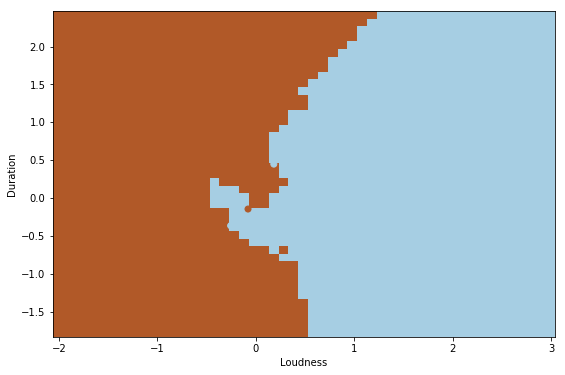

In [20]:
plt.figure(1, figsize=(9,6))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx,yy,Z)
plt.scatter(x[:, 0], x[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

KNN to predict on-time payment.

Use binary dependent variable to denote on-time payment.

Normalize independent vars, to see how much higher (or lower) spending is than typical

Possibly exclude some of the independent vars if very small relationship with outcome (run f-test)